## Rommel Fernandes
## Project 2 
## MNIST 

In [50]:
# Import the keras and pandas library for analysis 
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf


### Import MNSIT data 

In [4]:
# Import data from mnist libary 
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# Uses libary to convert data to categorical values 
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1)) # loads the training data
train_images = train_images.astype('float32') / 255   # converts the data to float precision
test_images = test_images.reshape((10000, 28, 28, 1))  # loads the test data
test_images = test_images.astype('float32') / 255    # converts the data to float precision
train_labels = to_categorical(train_labels)  # training data becomes categorical 
test_labels = to_categorical(test_labels)   # testing data becomes categorical 

In [6]:
# Train data example 
train_labels[1:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build the CNN model based on the requirments 

In [7]:
from keras import models
from keras import layers
from keras.optimizers import SGD

def cnn_model(learn_rate = 0.001):

    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
        
    # Compile model

    optimizer = SGD(lr=learn_rate, momentum  = 0.9)
    model.compile(optimizer = optimizer,  loss='categorical_crossentropy', metrics=['acc'])
    
    return model

### Determine the Best Model using Grid Search 

In [9]:
from sklearn.model_selection import GridSearchCV  # using sklearn Gridsearch to optimize the hyperparameters 
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier # Imports the SKlearn Classifier 
from sklearn.metrics import confusion_matrix

epochs =  [10, 50, 100]
learn_rate =  [0.001, 0.01, 0.1, 0.2, 0.3]
batch_size = [64,128,256,512,1024]

param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate)

model = KerasClassifier(build_fn=cnn_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train_images, train_labels)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.953050 using {'batch_size': 1024, 'epochs': 50, 'learn_rate': 0.001}


The best paramters are with a batch size  1024 with 50 epecohs and learning rate of 0.001

### Modeling with  paremters chosen from  Grid search  and use Tensor Board 

In [58]:
from time import time
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

learn_rate = 0.001
optimize = keras.optimizers.SGD(lr=learn_rate, momentum=0.9)
model = cnn_model(learn_rate)
epochs = 50
batch_size = 1024
model.compile(optimizer=optimize,
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size,  callbacks=[tensorboard])

Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 2.2988 - acc: 0.1266
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.2881 - acc: 0.1402
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.2732 - acc: 0.2010
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.2487 - acc: 0.3207
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.1998 - acc: 0.4336
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 2.0785 - acc: 0.5136
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 1.6939 - acc: 0.6395
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.9756 - acc: 0.7726
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.5801 - acc: 0.8392
Epoch 10/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.4416 - acc: 0.8721

### Accuracy 

In [59]:
#evaluate the accuracy 

test_loss, test_acc = model.evaluate(test_images, test_labels)
acc = history.history['acc']
test_acc

10000/10000 [==============================] - 1s 85us/step


0.9726

### Training accuracy vs Epochs 

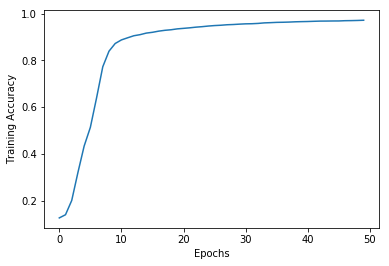

In [60]:
plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()

### Loss vs Epochs 

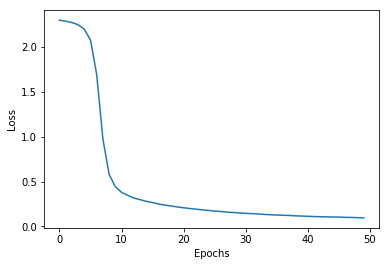

In [61]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Confusion Matrix

In [62]:
import numpy as np
#from keras.utils import probas_to_classes
from keras import utils

y_pred = model.predict_classes(test_images) 
y_true =  test_labels.argmax(axis=1)

In [63]:
# Compute a confusion matrix and a normalised confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 965    0    2    1    1    2    5    1    3    0]
 [   0 1119    4    0    0    0    4    1    7    0]
 [   1    1 1019    3    1    0    0    4    3    0]
 [   0    0    6  984    0   12    0    4    4    0]
 [   2    1    5    1  952    1    2    2    3   13]
 [   2    0    1    9    0  874    4    1    1    0]
 [   6    4    0    0    4    7  936    0    1    0]
 [   0    6   23    1    1    0    0  985    3    9]
 [   4    1   11   11    2    4    3    4  929    5]
 [   3    7    1    9    9    5    1    7    4  963]]
